# RMS Titanic

## O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

## A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte matando mais de 1500 pessoas, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

## Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843 m de profundidade e a 650 km ao sudeste de Terra Nova no Canadá. Sua história e naufrágio permaneceram no imaginário popular durante décadas, levando a produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic de 1997. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

*Fonte:* [WikiPedia](https://pt.wikipedia.org/wiki/RMS_Titanic)

--------


## A equipe da [Udacity](https://udacity.com) disponibilizou informações sobre uma parte dos passageiros à bordo do RMS Titanic no dia daquela tragédia. Esse _dataset_ que contém informações reais vem sendo utilizado em diversos estudos de caso, além de servir de base para aprendizado de Ciência de Dados, Estatística e Machine Learning.

## O arquivo **titanic.data** contém informações reais sobre os passageiros organizadas da seguinte forma:

- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

## O objetivo deste estudo é obter algumas informações estatísticas sobre a tragédia e realizar alguns _insights_ a respeito dos tripulantes e das circunstâncias que podem ter inteferido na sobrevivência ou não ao acidente.



Em um primeiro momento é necessário lermos os dados do arquivo titanic.data para podermos observar as informações e assim decidirmos qual é a melhor abordagem a se seguir para a análise.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tit = pd.read_csv('titanic.data', sep=',')
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Adequação de Dados
================
---

Logo que olhamos para algumas linhas do arquivo a ser analisado, podemos perceber que há alguns valores nulos, o que pode atrapalhar em uma análise, por esse motivo alguns comandos são executados para entendermos com mais clareza quais são esses valores nulos e que medidas podemos adotar para interferirmos o menos possível na análise posterior.

In [ ]:
tit.loc[:, tit.isnull().any()].columns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

É possível peceber que os valores nulos estão concentrados nas colunas Age, Cabin e Embarked, para cada uma delas uma estratégia deve ser tomada.

Quando olhamos para idade, utilizar se da média dos valores existentes é a estratégia mais coerente para não se alterar muito o padrão já existente.

A coluna Cabine não tem muito uma lógica para ser seguida, pois qualquer estratégia a ser tomada, seria mais uma tentativa de adivinhar o valor que não foi preenchido.

Já quando pensamos no local de embarque, faz sentido utilizarmos o valor anterior para preencher esses dados faltantes, pois muito provavelmente a pessoa embarcou no mesmo local de pessoas próximas a ela na listagem de passageiros.

In [ ]:
tit['Age'] = tit['Age'].fillna(tit['Age'].mean())
tit['Cabin'] = tit['Cabin'].fillna(0)
tit['Embarked'] = tit['Embarked'].fillna(method='ffill')

In [ ]:
tit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Algumas colunas não serão necessárias para nossa análise, são elas 'SibSp','Parch' e 'Ticket', por isso elas serão removidas, para assim facilitarmos o processo.

In [ ]:
tit = tit.drop(axis=1, columns=['SibSp','Parch','Ticket'])
tit.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S


Para um melhor entendimento, também são alterados os valores da coluna que indica se um passageiro sobreviveu ou não, transformando de números para texto.

In [ ]:
tit['Survived'] = tit['Survived'].replace([0, 1], ['No', 'Yes'])
tit.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S


Localização da Cabine x Sobrevivência ao Acidente
===============
---

Com os passos executados anteriormente, temos os dados de uma maneira que podemos começar a analisar informações que podem ter tido influência no desfecho desse acidente para alguns passageiros.

Começamos essa análise verificando o número de pessoas que sobreviveram e de pessoas que acabaram não sobrevivendo ao acidente.

In [ ]:
tit['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

Em um próximo passo, tendo além dos dados, a planta do navio para nos auxiliar, verificamos se a posição de cada cabine pode ter influenciado ou não na sobrevivência de um passageiro.

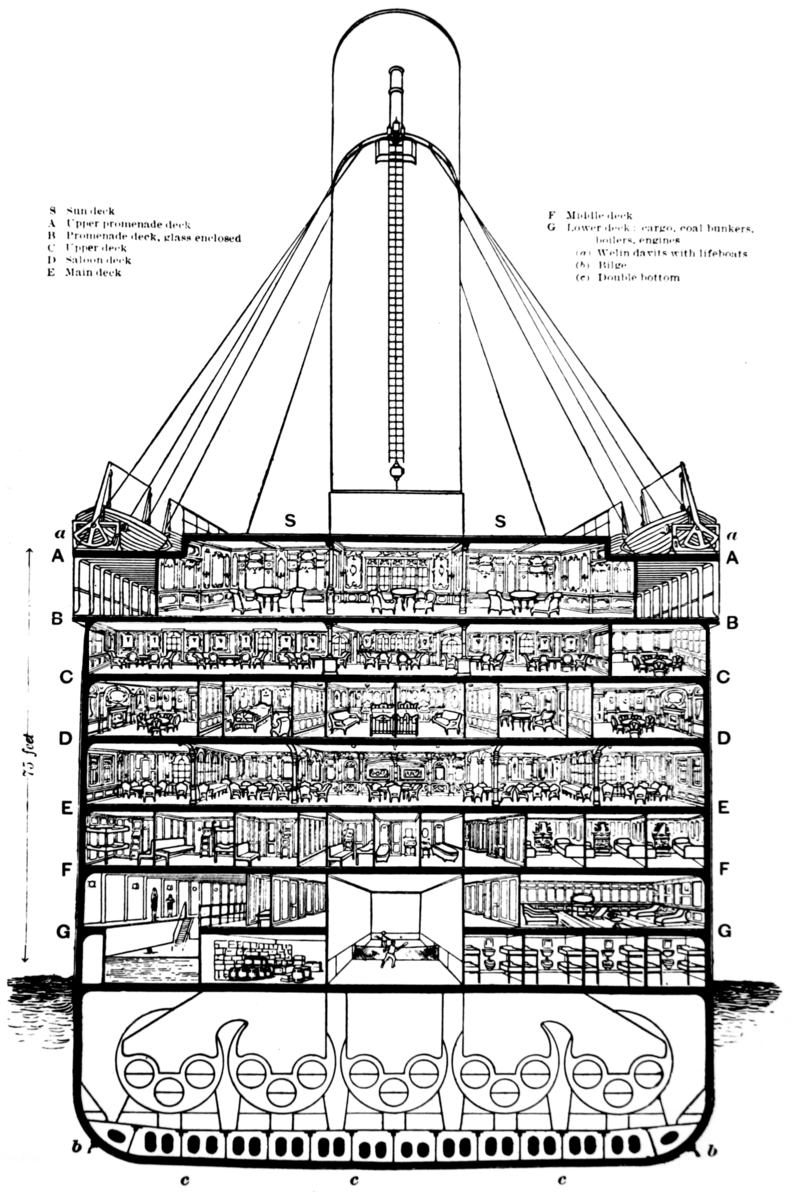

In [ ]:
tit["CabinLetter"] = tit['Cabin'].str[0]
tit.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,CabinLetter
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,NaN
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,NaN
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,C
4,5,No,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,NaN


In [ ]:
titFlow = tit[tit["CabinLetter"].notnull()]
titFlow.groupby(by=["CabinLetter"])["Survived"].value_counts()

CabinLetter  Survived
A            No           8
             Yes          7
B            Yes         35
             No          12
C            Yes         35
             No          24
D            Yes         25
             No           8
E            Yes         24
             No           8
F            Yes          8
             No           5
G            No           2
             Yes          2
T            No           1
Name: Survived, dtype: int64

In [ ]:
countValues = titFlow[titFlow["Survived"] == "Yes"].groupby(by=["CabinLetter"])["Survived"].value_counts()
countValues

CabinLetter  Survived
A            Yes          7
B            Yes         35
C            Yes         35
D            Yes         25
E            Yes         24
F            Yes          8
G            Yes          2
Name: Survived, dtype: int64

In [ ]:
df_val_counts = pd.DataFrame(countValues)
df_val_counts.columns = ['SurvivedCount']
df_val_counts['CabinLetter'] = df_val_counts.index
df_val_counts

,,SurvivedCount,CabinLetter
CabinLetter,Survived,,
A,Yes,7,"(A, Yes)"
B,Yes,35,"(B, Yes)"
C,Yes,35,"(C, Yes)"
D,Yes,25,"(D, Yes)"
E,Yes,24,"(E, Yes)"
F,Yes,8,"(F, Yes)"
G,Yes,2,"(G, Yes)"


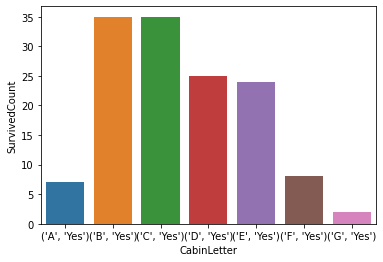

In [ ]:
sns.barplot(x="CabinLetter",y="SurvivedCount",data=df_val_counts)
plt.show()

In [ ]:
titFlow.groupby(by=["CabinLetter","Pclass"])["Survived"].value_counts()

CabinLetter  Pclass  Survived
A            1       No           8
                     Yes          7
B            1       Yes         35
                     No          12
C            1       Yes         35
                     No          24
D            1       Yes         22
                     No           7
             2       Yes          3
                     No           1
E            1       Yes         18
                     No           7
             2       Yes          3
                     No           1
             3       Yes          3
F            2       Yes          7
                     No           1
             3       No           4
                     Yes          1
G            3       No           2
                     Yes          2
T            1       No           1
Name: Survived, dtype: int64

Analisando-se as informações obtidas acima, podemos notar que apesar de em sua maioria os registros de cada passageiro não apresentarem a informação correta da cabine, com os dados existentes é possível perceber que a maior parte dos sobreviventes são pessoas que estavam em cabines localizadas na parte mais alta do navio, passageiros da classe 1, ou seja pessoas que acabaram pagando um valor mais alto para ter sua cabine em local de certa forma privilegido.

Classe do Ticket x Sobrevivência ao Acidente
===============
---

In [ ]:
classe1 = tit[tit["Pclass"] == 1]

(len(classe1[classe1["Survived"] == "Yes"]) / len(classe1)) * 100

62.96296296296296

In [ ]:
classe2 = tit[tit["Pclass"] == 2]

(len(classe2[classe2["Survived"] == "Yes"]) / len(classe2)) * 100

47.28260869565217

In [ ]:
classe3 = tit[tit["Pclass"] == 3]

(len(classe3[classe3["Survived"] == "Yes"]) / len(classe3)) * 100

24.236252545824847

Tendo em mãos as porcentagens de sobreviventes de acordo com a classe de seu Ticket, fica ainda mais evidente a influência que isso pode ter tido quanto ao desfecho de cada passageiro, já que temos praticamente 63% dos passageiros de classe 1 sobreviventes e somente 24% dos passageiros de classe 3.

Idade/Gênero Passageiro x Sobrevivência ao Acidente
==============
---

Outro ponto bastante interessante que podemos observar, é quanto ao genêro dos passageiros, tendo um valor em porcentegem de sobreviventes bem maior para as pessoas do sexo femenino. Isso confirma que muito provavelmente houve uma ordem de evacuação do navio, dando prioridade a um certo grupo, sendo este formado por mulheres e crianças, como pode também ser visto no cálculo de porcentagem do grupo prioritário abaixo.

A média de idade de homens que não sobreviveram a esse acidente deixa esse ponto bem evidente também, já que indica pessoas adultas, com idade em torno de 31 anos.

In [ ]:
tit['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
tit.groupby(by=["Pclass", "Sex"])["Survived"].value_counts()

Pclass  Sex     Survived
1       female  Yes          91
                No            3
        male    No           77
                Yes          45
2       female  Yes          70
                No            6
        male    No           91
                Yes          17
3       female  No           72
                Yes          72
        male    No          300
                Yes          47
Name: Survived, dtype: int64

In [ ]:
(len(tit[((tit['Sex'] == 'male') & (tit['Survived'] == 'Yes'))])) / len(tit[tit['Sex'] == 'male']) * 100

18.890814558058924

In [ ]:
(len(tit[((tit['Sex'] == 'female') & (tit['Survived'] == 'Yes'))])) / len(tit[tit['Sex'] == 'female']) * 100

74.20382165605095

In [ ]:
prioritarios = tit[((tit["Sex"] == "female") | (tit["Age"] <= 15))]

(len(prioritarios[prioritarios["Survived"] == "Yes"]) / len(prioritarios)) * 100

71.75141242937853

In [ ]:
tit[((tit["Survived"] == "No") & (tit["Sex"] == "male"))]["Age"].mean()

31.175223730517818

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


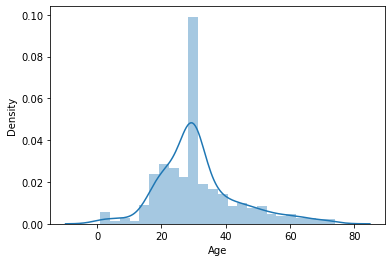

In [ ]:
sns.distplot(tit[((tit["Survived"] == "No") & (tit["Sex"] == "male"))]["Age"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


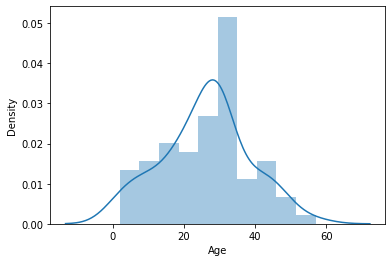

In [ ]:
sns.distplot(tit[((tit["Survived"] == "No") & (tit["Sex"] == "female"))]["Age"])
plt.show()

Variáveis de maior influência
==============
---

Por fim, tendo como base os dados providos, além da planta do navio, podemos entender que três informações tiveram grande influência na sobrevivência ou não de cada passageiro. 

A Classe do Ticket em combinação com a localização de cada cabine, deixando claro que a evacuação das pessoas foi feita pela parte mais alta do navio. Portanto, quanto mais alta a localização da cabine estivesse seria melhor, pelo fator de que seria mais fácil chegar se ao ponto de evacuação, além de fisicamente ser mais lógico que a água acabe inundando em um primeiro momento as partes mais fundas do navio.

A segunda informação, é a respeito do genêro de cada pessoa, que deixa bem claro que houve uma prioridade na evacuação para pessoas do sexo feminino.

É ai que também entra a terceira medida de grande importância observada, sendo esta, a idade, destacando se o número de sobreviventes considerados crianças, formando assim em conjunto com as mulheres presentes, um grupo de prioridade para ser evacuado do navio. Os dois gráficos exibidos acima (1º Idade de homens não sobreviventes, 2º Idade de mulheres não sobreviventes), contendo a quantidade de não sobreviventes dividida por sexo colabora com a identificação das crianças como grupo prioritário.